In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [22]:
""" target function: r(θ) = 4 * sin(5θ)"""
def target_function(theta):
    return 4 * torch.sin(5 * theta)


In [23]:
# Generate input data: 100 points between 0 and π (valid domain for the polar plot)
theta_train = torch.linspace(0, np.pi, 100).view(-1, 1)
r_train = target_function(theta_train)


In [24]:

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)  # Hidden layer
        #self.activation = nn.Tanh()  # Non-linear activation function
        #self.activation = nn.ReLU()
        #self.activation = nn.LeakyReLU()
        #self.activation = nn.ELU()
        self.activation = nn.Sigmoid()
        self.output = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x


In [25]:
# Custom MSE Loss Function
def custom_mse_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()


In [26]:
class CustomAdamOptimizer:
    def __init__(self, params, lr=0.01, betas=(0.9, 0.999), eps=1e-8):
        self.params = list(params)
        self.lr = lr
        self.betas = betas
        self.eps = eps
        self.t = 0  # Time step
        self.m = [torch.zeros_like(p) for p in self.params]  
        self.v = [torch.zeros_like(p) for p in self.params]  

    def step(self):
        self.t += 1
        for i, param in enumerate(self.params):
            if param.grad is None:
                continue
            #biased first moment estimate
            self.m[i] = self.betas[0] * self.m[i] + (1 - self.betas[0]) * param.grad
            #biased second raw moment estimate
            self.v[i] = self.betas[1] * self.v[i] + (1 - self.betas[1]) * (param.grad ** 2)
            #bias-corrected first moment estimate
            m_hat = self.m[i] / (1 - self.betas[0] ** self.t)
            #bias-corrected second raw moment estimate
            v_hat = self.v[i] / (1 - self.betas[1] ** self.t)
            
            param.data -= self.lr * m_hat / (torch.sqrt(v_hat) + self.eps)

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()


In [27]:

input_size = 1
hidden_size = 10  
output_size = 1

model = SimpleNN(input_size, hidden_size, output_size)


optimizer = CustomAdamOptimizer(model.parameters(), lr=0.01)


In [28]:
# Training the model
epochs = 2000
for epoch in range(epochs):
    model.train()

    # Forward pass
    # Ensure x_train is a tensor
    theta_train_tensor = torch.from_numpy(theta_train.numpy()) if isinstance(theta_train, torch.Tensor) else theta_train
    r_pred = model(theta_train_tensor)
    loss = custom_mse_loss(r_pred, r_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/2000], Loss: 7.6833
Epoch [20/2000], Loss: 7.6923
Epoch [30/2000], Loss: 7.6581
Epoch [40/2000], Loss: 7.6538
Epoch [50/2000], Loss: 7.6452
Epoch [60/2000], Loss: 7.6390
Epoch [70/2000], Loss: 7.6304
Epoch [80/2000], Loss: 7.6208
Epoch [90/2000], Loss: 7.6086
Epoch [100/2000], Loss: 7.5937
Epoch [110/2000], Loss: 7.5755
Epoch [120/2000], Loss: 7.5533
Epoch [130/2000], Loss: 7.5267
Epoch [140/2000], Loss: 7.4953
Epoch [150/2000], Loss: 7.4588
Epoch [160/2000], Loss: 7.4171
Epoch [170/2000], Loss: 7.3700
Epoch [180/2000], Loss: 7.3173
Epoch [190/2000], Loss: 7.2590
Epoch [200/2000], Loss: 7.1951
Epoch [210/2000], Loss: 7.1263
Epoch [220/2000], Loss: 7.0537
Epoch [230/2000], Loss: 6.9791
Epoch [240/2000], Loss: 6.9042
Epoch [250/2000], Loss: 6.8306
Epoch [260/2000], Loss: 6.7597
Epoch [270/2000], Loss: 6.6928
Epoch [280/2000], Loss: 6.6304
Epoch [290/2000], Loss: 6.5730
Epoch [300/2000], Loss: 6.5207
Epoch [310/2000], Loss: 6.4736
Epoch [320/2000], Loss: 6.4314
Epoch [330/2000],

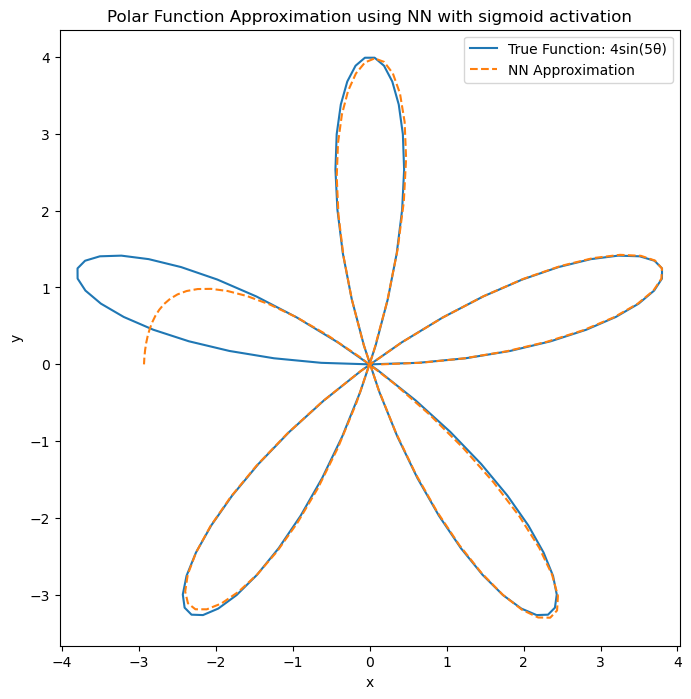

In [29]:
# Evaluate the model
model.eval()
with torch.no_grad():
    r_pred = model(theta_train)

# Convert polar to Cartesian for plotting
x_train = (r_train * torch.cos(theta_train)).numpy()
y_train = (r_train * torch.sin(theta_train)).numpy()
x_pred = (r_pred * torch.cos(theta_train)).numpy()
y_pred = (r_pred * torch.sin(theta_train)).numpy()

# Plotting the original function and the model's approximation
plt.figure(figsize=(8, 8))
plt.plot(x_train, y_train, label='True Function: 4sin(5θ)')
plt.plot(x_pred, y_pred, label='NN Approximation', linestyle='--')
plt.title('Polar Function Approximation using NN with sigmoid activation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.show()


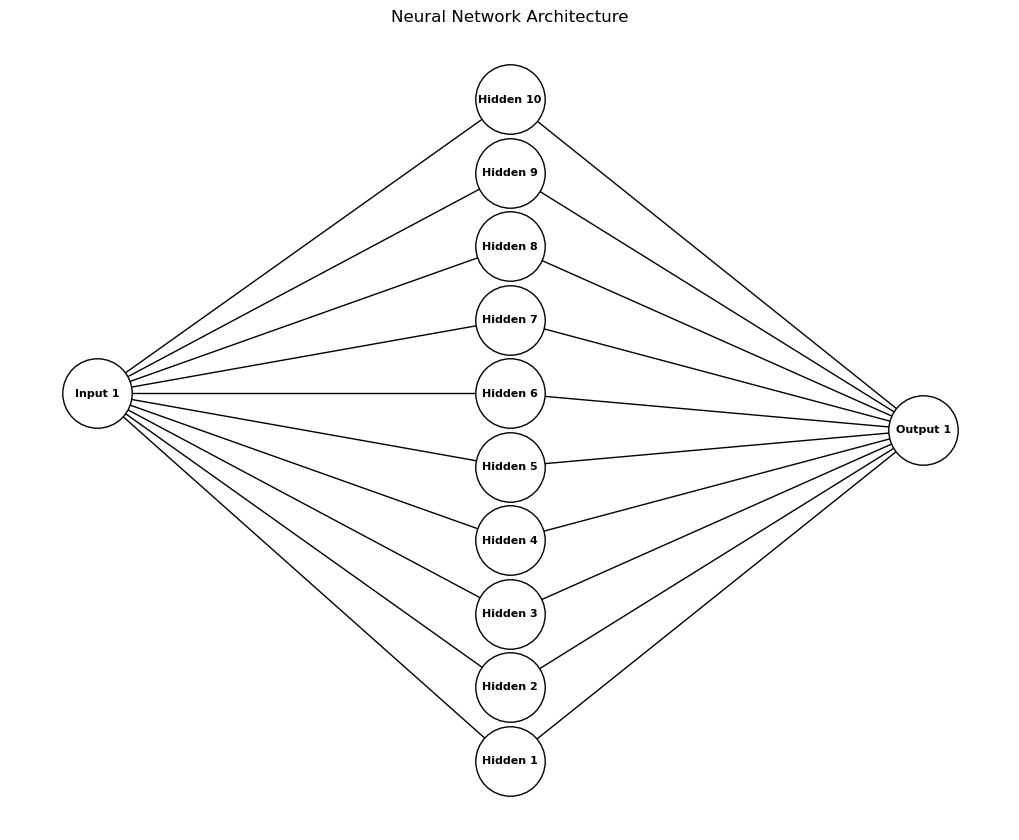

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network(input_size, hidden_size, output_size):
    G = nx.DiGraph()  
    
    # Add nodes for input layer
    for i in range(input_size):
        G.add_node(f"Input {i+1}", pos=(0, i))
    
    # Add nodes for hidden layer
    for i in range(hidden_size):
        G.add_node(f"Hidden {i+1}", pos=(1, i - hidden_size/2))
    
    # Add nodes for output layer
    for i in range(output_size):
        G.add_node(f"Output {i+1}", pos=(2, i - output_size/2))
    
    
    for i in range(input_size):
        for j in range(hidden_size):
            G.add_edge(f"Input {i+1}", f"Hidden {j+1}")
    
  
    for i in range(hidden_size):
        for j in range(output_size):
            G.add_edge(f"Hidden {i+1}", f"Output {j+1}")
    
    # Position nodes using the pos attribute
    pos = nx.get_node_attributes(G, 'pos')
    
    
    plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

    # Draw the network
    nx.draw(
        G, 
        pos, 
        with_labels=True, 
        arrows=False, 
        node_size=2500,          # Increase node size
        node_color='white',      # Set node color to white (not filled)
        edgecolors='black',      # Outline color of the nodes
        font_size=8,             # Smaller font size for clearer visibility
        font_weight='bold'
    )
    
    # Display the flowchart
    plt.title('Neural Network Architecture')
    plt.show()

# Call the function to draw the neural network
draw_neural_network(input_size=1, hidden_size=10, output_size=1)
